# Аппроксимация

Рассмотрим сложную математическую функцию на отрезке [1, 15]:
Как известно, многочлен степени $n$ (то есть $w_0 + w_1 x + w_2 x^2 + ... + w_n x^n$) однозначно определяется любыми $n + 1$ различными точками, через которые он проходит. Это значит, что его коэффициенты $w_0, ... w_n$ можно определить из следующей системы линейных уравнений:

где через $x_1, ..., x_n, x_{n+1}$ обозначены точки, через которые проходит многочлен, а через $f(x_1), ..., f(x_n), f(x_{n+1}$) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.





In [ ]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
xmin = 1
xmax = 15

$$ f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) $$

In [ ]:
def func(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

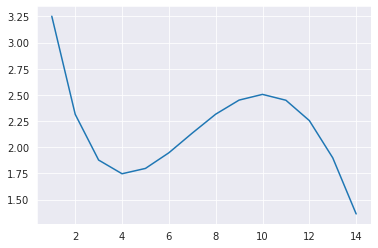

In [ ]:
xmin = 1
xmax = 15
step = 1
xlist = [x for x in range(xmin, xmax, step)]
ylist = [func (x) for x in xlist]
plt.plot (xlist, ylist)
plt.show()

Берем многочлен первой степени $w0 + w1*x = y$
Подставляем в него x (1 и 5) и y (вычисляем f от x)  


В точке 1 получаем: $w0 + w1 * 1 = sin(1/5) * exp(1/10) + 5*exp(-1/2)$  


В точке 15 получаем: $w0 + w1 * 15 = sin(15/5) * exp(15/10) + 5*exp(-15/2)$

Получаем систему уравнений:  
$w0 + 1 * w1 = 3.252$  
$w0 + 15 * w1 = 0.635$


И так далее для многочлена второй степени, третей и четвертой, и пятой

In [ ]:
def matrixA (x):
    step = len(x)
    values = []
    
    for i in x:
        for j in range(step):
            values.append(i**j)
    res = np.array(values)
    res = res.reshape(step,step)
    return res

def arrayB(x):
    values = []
    for i in x:
        values.append(func(i))
    res = np.array(values)
    return res

def getW(w,x):
    f = 0
    for i in range(len(w)):
        f = f + w[i] * x ** i
    return f

Многочлен степени: 1
[ 3.43914511 -0.18692825]


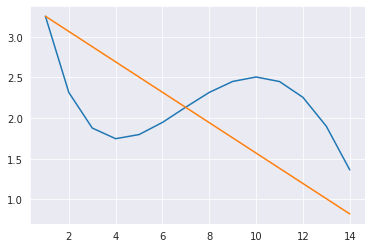

Многочлен степени: 2
[ 3.32512949 -0.06531159 -0.00760104]


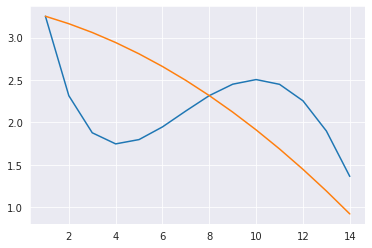

Многочлен степени: 3
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


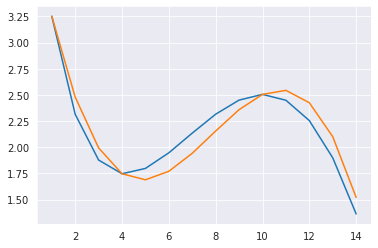

Многочлен степени: 5
[ 4.75711726e+00 -1.87108213e+00  4.00448563e-01 -3.57322142e-02
  1.49324198e-03 -2.78594143e-05]


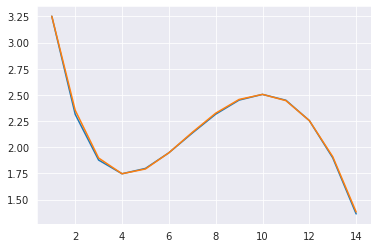

In [ ]:
X_values = [[1,15],[1,8,15],[ 1,4,10,15], [1,4,6, 10,12, 15]]
for x in X_values:
    print ('Многочлен степени:', len(x) - 1)
    A = matrixA(x)
    b = arrayB(x)
    w = np.linalg.solve(A, b)
    print (w)
    ylist_w = [getW(w , x) for x in xlist]
    plt.plot (xlist, ylist, xlist, ylist_w)
    plt.show()

#Минимизация гладкой функции

Рассмотрим все ту же функцию из задания по линейной алгебре:   

$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$, 

но теперь уже на промежутке [1, 30]. 

`def func(x):`
    `return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)`




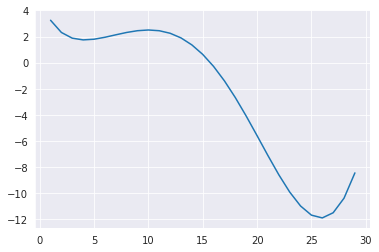

In [ ]:
xmin_1 = 1
xmax_1 = 30
step_1 = 1
xlist_1 = [x for x in range(xmin_1, xmax_1, step_1)]
ylist_1 = [func (x) for x in xlist_1]
plt.plot (xlist_1, ylist_1)
plt.show()

In [ ]:
from scipy.optimize import minimize
min_x0 = list(range(30))
min_xlist_1 = []
min_ylist_1 = []
for x0 in min_x0:
    res = minimize(func, x0)
    if ((res['x'] <= 30) and (res['success'] == True)):
        min_xlist_1.append(x0)
        min_ylist_1.append(res ['fun'])

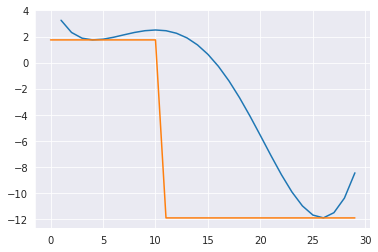

In [ ]:
plt.plot (xlist_1, ylist_1, min_xlist_1, min_ylist_1)
plt.show()

In [ ]:
min_ans = 2
ans_min_1 = minimize(func, min_ans, method='BFGS')
ans_1 = round(ans_min_1 ['fun'],2)
print (f'Answer_01 = {ans_1}')

Answer_01 = 1.75


In [ ]:
min_ans_30 = 30
ans_min_2 = minimize(func, min_ans_30, method='BFGS')
ans_2 = round(ans_min_2 ['fun'],2)
print (f'Answer_02 = {ans_2}')

Answer_02 = -11.9


In [ ]:
result = open('Submission_01.txt', 'w')
result.write(str(ans_1)+" "+str(ans_2))
result.close()

#Дифференциальная эволюция

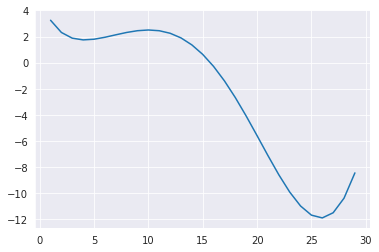

In [20]:
xmin_1 = 1
xmax_1 = 30
step_1 = 1
xlist_1 = [x for x in range(xmin_1, xmax_1, step_1)]
ylist_1 = [func (x) for x in xlist_1]
plt.plot (xlist_1, ylist_1)
plt.show()

In [21]:
from scipy.optimize import differential_evolution

In [23]:
buckets = [(0,30)]
result = differential_evolution(func, buckets)
print (result['x'], result['fun'], result['nfev'],result['nit'])
answer_03 = round(result['fun'],2)
print (f'Answer_3 = {answer_03}')

[25.88019286] -11.898894665981313 83 4
Answer_3 = -11.9


In [25]:
solution = open('Submission_02.txt', 'w')
solution.write(str(answer_03))
solution.close()

#Минимизация негладкой функции

Рассмотрим функцию $h(x) = int(f(x))$ на том же отрезке [1, 30], т.е. теперь каждое значение $f(x)$ приводится к типу int и функция принимает только целые значения

In [28]:
#функция f(x) создана выше
def func_h(x):
    return int(func(x))

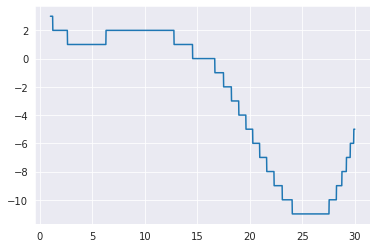

In [32]:
xmin_h = 1
xmax_h = 30
float_range_array = np.arange(start=xmin_h, stop=xmax_h, step=0.01)
xlist_h = list(float_range_array)
ylist_h = [func_h (x) for x in xlist_h]
plt.plot (xlist_h, ylist_h)
plt.show()

In [36]:
from scipy.optimize import minimize
min_x0 = list(range(30))
min_xlist_2 = []
min_ylist_2 = []
for x0 in min_x0:
    res = minimize(func_h, x0)
    if ((res['x'] <= 30) and (res['success'] == True)):
        min_xlist_2.append(x0)
        min_ylist_2.append(res ['fun'])

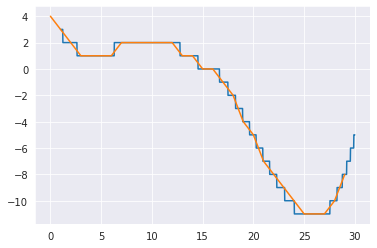

In [37]:
plt.plot (xlist_h, ylist_h, min_xlist_2, min_ylist_2)
plt.show()

In [39]:
min_ans_30_h = 30
ans_min_2_h = minimize(func_h, min_ans_30_h, method='BFGS')
ans_2_h = round(ans_min_2_h ['fun'],2)
print (f'Answer_04 = {ans_2_h}')

Answer_04 = -5


In [40]:
buckets = [(0,30)]
result = differential_evolution(func_h, buckets)
print (result['x'], result['fun'], result['nfev'],result['nit'])
answer_05 = round(result['fun'],2)
print (f'Answer_5 = {answer_05}')

[24.5580764] -11.0 92 5
Answer_5 = -11.0


In [42]:
solution = open('Submission_03.txt', 'w')
solution.write(str(ans_2_h)+''+str(answer_05))
solution.close()